## KNN Approach



### Setup

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets

import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler


from pyMLaux import plot_history, evaluate_classification_result

2024-03-20 20:24:08.841966: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-03-20 20:24:09.045158: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-20 20:24:09.045189: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-20 20:24:09.077586: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-20 20:24:09.148396: I tensorflow/core/platform/cpu_feature_guar

In [2]:
## adapt this directory to your needs
# TODO-> change path to be dynamic 
base_dir = '/home/bac/activity_prediction/implementation/'
data_dir = base_dir + 'data/'

### load & prepare dataset

the following code needs to be adapted for each protein-ligand complex individually

In [3]:
nn_data_raw = pd.read_csv(data_dir+"COX1/COX1.csv")

nn_data_raw

,INDEX,NAME,Hydrogen_Bond:ALA527A,Halogen_Bond:ASP110A,Hydrophobic_Interaction:ILE345A,Hydrophobic_Interaction:TYR466A,Hydrogen_Bond:GLU520A,Hydrogen_Bond:VAL116A,Pi-Stacking:PHE205A,Hydrophobic_Interaction:LEU115A,...,Hydrophobic_Interaction:PRO86A,Hydrogen_Bond:TYR348A,Halogen_Bond:TYR355A,Hydrophobic_Interaction:PHE201A,Hydrophobic_Interaction:PRO363A,Hydrogen_Bond:GLN351A,Hydrogen_Bond:SER353A,Water_Bridge:PRO86A,Halogen_Bond:LEU112A,LABEL
0,1,CHEMBL314337|COX1_actives_final_part2|sdf|163,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,active
1,2,CHEMBL305971|COX1_actives_final_part2|sdf|13,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,active
2,3,ZINC00705195|decoys_final|sdf|51,0,0,0,1,1,0,0,0,...,1,0,0,0,0,0,0,0,0,inactive
3,4,ZINC17088576|decoys_final|sdf|59,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,inactive
4,5,ZINC06204226|decoys_final|sdf|97,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,inactive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1033,1034,ZINC53927572|decoys_final|sdf|36,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,inactive
1034,1035,ZINC48571703|decoys_final|sdf|388,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,inactive
1035,1036,ZINC50122389|decoys_final_part3|sdf|257,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,inactive
1036,1037,ZINC60280739|decoys_final_part3|sdf|282,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,inactive


In [4]:
lookup = {'inactive':0,'active':1}

nn_data = {'data': np.array(nn_data_raw.iloc[:, 2:-1]),
             'target': np.array([lookup[y] for y in nn_data_raw.iloc[0:,-1]]),
             'feature_names': nn_data_raw.columns[2:-1],
             'target_names': ['inactive', 'active']}


split into train- and test-set

In [5]:
X_train, X_test, y_train, y_test = train_test_split(nn_data['data'], nn_data['target'],
                                                    test_size=0.3, random_state=4232)



### train and apply neural network

In [9]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(nn_data['data'].shape[1], )),
    tf.keras.layers.Dense(3, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 3)                 627       
                                                                 
 dropout_1 (Dropout)         (None, 3)                 0         
                                                                 
 dense_3 (Dense)             (None, 10)                40        
                                                                 
Total params: 667 (2.61 KB)
Trainable params: 667 (2.61 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/150
37/37 - 1s - loss: 2.2618 - accuracy: 0.6414 - val_loss: 2.1991 - val_accuracy: 0.6918 - 943ms/epoch - 25ms/step
Epoch 2/150
37/37 - 0s - loss: 2.0688 - accuracy: 0.6983 - val_loss: 1.9256 - val_accuracy: 0.7192 - 275ms/epoch - 7ms/step
Epoch 3/150
37/37 - 0s - loss: 1.7832 - accuracy: 0.7121 - val_loss: 1.6155 - val_accuracy: 0.7192 - 281ms/epoch - 8ms/step
Epoch 4/150
37/37 - 0s - loss: 1.5362 - accuracy: 0.7172 - val_loss: 1.3596 - val_accuracy: 0.7192 - 290ms/epoch - 8ms/step
Epoch 5/150
37/37 - 0s - loss: 1.4156 - accuracy: 0.7207 - val_loss: 1.1735 - val_accuracy: 0.7192 - 308ms/epoch - 8ms/step
Epoch 6/150
37/37 - 0s - loss: 1.2679 - accuracy: 0.7207 - val_loss: 1.0338 - val_accuracy: 0.7192 - 263ms/epoch - 7ms/step
Epoch 7/150
37/37 - 0s - loss: 1.1445 - accuracy: 0.7207 - val_loss: 0.9325 - val_accuracy: 0.7192 - 272ms/epoch - 7ms/step
Epoch 8/150
37/37 - 0s - loss: 1.0908 - accuracy: 0.7224 - val_loss: 0.8606 - val_accuracy: 0.7192 - 275ms/epoch - 7ms/step
Epoch 9

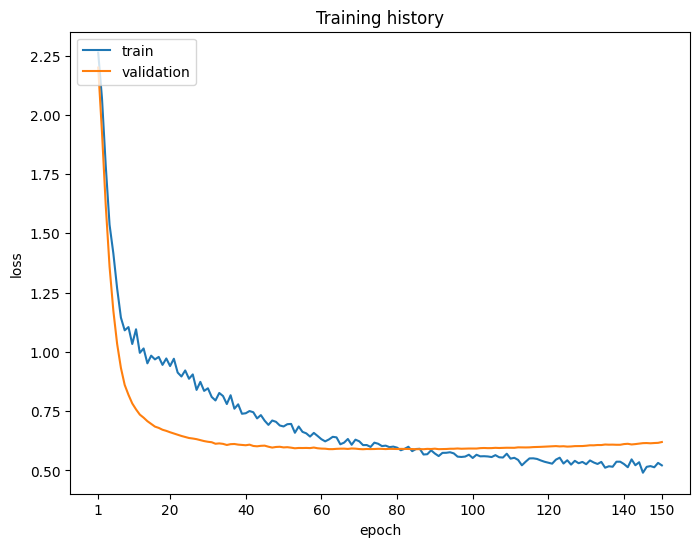

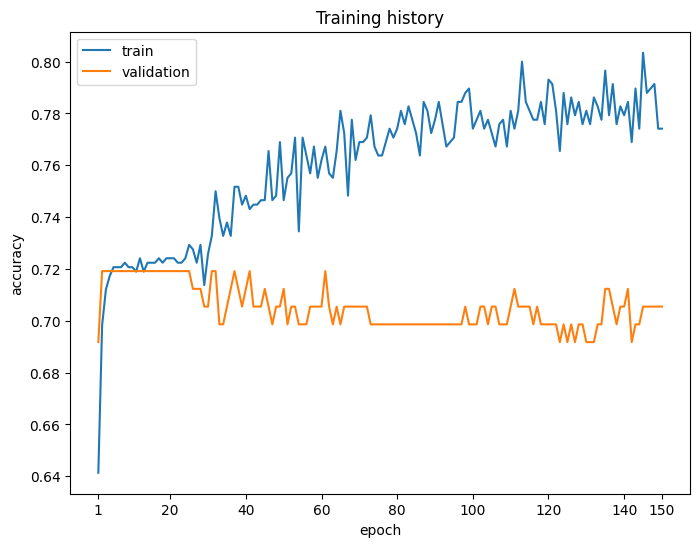

In [10]:
history = model.fit(x=X_train, y=y_train, epochs=150, batch_size=16, validation_split=0.2, verbose=2)
plot_history(history)

Evaluate Testdata using model

In [11]:
pred = model.predict(X_test)

evaluate_classification_result(y_test, pred, classes=nn_data["target_names"])


10/10 [==============================] - 0s 1ms/step
[[202  16]
 [ 71  23]]


Class inactive:
    Sensitivity (TPR):  92.661% (202 of 218)
    Specificity (TNR):  24.468% (23 of 94)
    Precision:          73.993% (202 of 273)
    Neg. pred. value:   58.974% (23 of 39)
Class active:
    Sensitivity (TPR):  24.468% (23 of 94)
    Specificity (TNR):  92.661% (202 of 218)
    Precision:          58.974% (23 of 39)
    Neg. pred. value:   73.993% (202 of 273)

Overall accuracy:   72.115% (225 of 312)
Balanced accuracy:  58.564%


array([[202,  16],
       [ 71,  23]])